In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import Normalizer, Binarizer, MinMaxScaler, \
    QuantileTransformer, StandardScaler, KernelCenterer, RobustScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import activations

from keras.callbacks import EarlyStopping, ModelCheckpoint

Index(['B_OWNPV_CHI2', 'B_IPCHI2_OWNPV', 'B_FDCHI2_OWNPV', 'B_DIRA_OWNPV',
       'B_PT', 'Kst_892_0_IP_OWNPV', 'Kst_892_0_cosThetaH', 'Kplus_IP_OWNPV',
       'Kplus_P', 'piminus_IP_OWNPV', 'piminus_P', 'gamma_PT', 'piminus_ETA',
       'Kplus_ETA', 'signal'],
      dtype='object')


c:\bin\python3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\bin\python3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\bin\python3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\bin\python3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecat

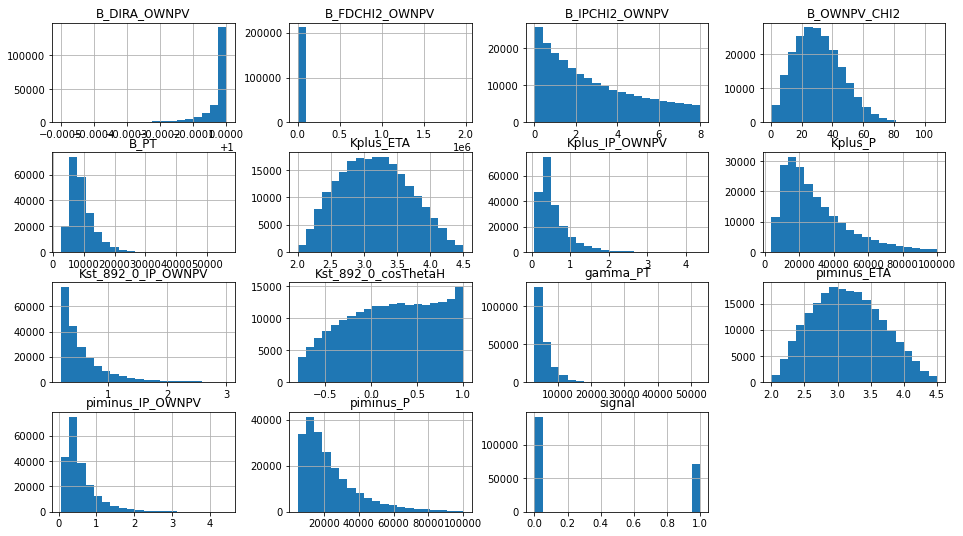

In [3]:
df = pd.read_csv('../data/train.csv', index_col=0)
df_eval = pd.read_csv('../data/test.csv', index_col=0)

df.columns = df.columns.str.strip()
df_eval.columns = df_eval.columns.str.strip()

del df['BUTTER']
del df_eval['BUTTER']

print(df.columns)

_ = df.hist(bins=20, figsize=[16,9])

## Preprocess Data

In [52]:
def preprocess_data(df):
    df2 = df.copy()
    
#     Not using EXP / LOG for now
#     for col in df.columns[:-1]:
#         df2['EXP_'+col] = np.exp(df[col])
#         df2['LOG_'+col] = np.log(df[col])

    # TODO: idea add a new variable that is the P(signal) for that particular line
    # I.e. always P(signal=1)
            
    done = set()
    for col1 in df.columns:
        for col2 in df.columns:
            colname = '__X__'.join(sorted((col1,col2)))
            if col1 != col2 and colname not in done:
                df2[colname] = df[col1] * df[col2]
                done.add(colname)
    
    return df2
    
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
    
X = preprocess_data(X)
X_eval = preprocess_data(df_eval)

X[:3]
# _ = X.hist(bins=20, figsize=[16,9])

,B_OWNPV_CHI2,B_IPCHI2_OWNPV,B_FDCHI2_OWNPV,B_DIRA_OWNPV,B_PT,Kst_892_0_IP_OWNPV,Kst_892_0_cosThetaH,Kplus_IP_OWNPV,Kplus_P,piminus_IP_OWNPV,...,piminus_IP_OWNPV__X__piminus_P,gamma_PT__X__piminus_IP_OWNPV,piminus_ETA__X__piminus_IP_OWNPV,Kplus_ETA__X__piminus_IP_OWNPV,gamma_PT__X__piminus_P,piminus_ETA__X__piminus_P,Kplus_ETA__X__piminus_P,gamma_PT__X__piminus_ETA,Kplus_ETA__X__gamma_PT,Kplus_ETA__X__piminus_ETA
Id,,,,,,,,,,,,,,,,,,,,,
0,28.878847,2.662533,2924.690991,0.999997,19085.568945,0.569198,-0.575502,0.581565,66850.893711,0.637969,...,9121.987912,5065.915128,1.676918,1.709831,1.135399e+08,37583.944252,38321.608610,20872.322302,21281.985751,7.044756
1,34.233566,0.092746,346.948714,0.999997,6631.244546,0.248707,-0.615941,0.277898,39274.475071,0.148815,...,1719.289561,581.077002,0.489975,0.459208,4.511142e+07,38038.833067,35650.222881,12856.177095,12048.886412,10.159856
2,36.113632,2.442423,238.553023,0.999986,7740.918989,0.222347,0.249383,0.216576,27757.153899,0.249840,...,6016.438340,1183.963190,0.857868,0.779976,1.141182e+08,82687.022867,75179.239695,16271.818280,14794.376243,10.719615


In [53]:
scaler = StandardScaler()
# scaler = RobustScaler(quantile_range=(0.1,0.9))

X_train, X_test, y_train, y_test = train_test_split(X.fillna(0), y, test_size=0.10, random_state=0)
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_train.columns)

print(X_train.shape, X_test.shape)
X_test[:3]

(191395, 105) (21267, 105)


,B_OWNPV_CHI2,B_IPCHI2_OWNPV,B_FDCHI2_OWNPV,B_DIRA_OWNPV,B_PT,Kst_892_0_IP_OWNPV,Kst_892_0_cosThetaH,Kplus_IP_OWNPV,Kplus_P,piminus_IP_OWNPV,...,piminus_IP_OWNPV__X__piminus_P,gamma_PT__X__piminus_IP_OWNPV,piminus_ETA__X__piminus_IP_OWNPV,Kplus_ETA__X__piminus_IP_OWNPV,gamma_PT__X__piminus_P,piminus_ETA__X__piminus_P,Kplus_ETA__X__piminus_P,gamma_PT__X__piminus_ETA,Kplus_ETA__X__gamma_PT,Kplus_ETA__X__piminus_ETA
0,0.135303,-1.063038,-0.068912,0.429082,2.349834,0.061579,1.573659,-0.220530,-0.934353,0.212824,...,-0.239870,1.423257,-0.214919,-0.233743,0.431639,-0.723915,-0.732474,1.308589,1.251533,-1.620060
1,-0.419099,-0.299084,-0.000083,0.494965,-0.218559,0.145170,-1.559699,0.382258,1.097414,-0.609718,...,-0.570075,-0.564005,-0.559713,-0.539002,-0.470450,-0.320888,-0.300782,-0.378746,-0.344267,0.348389
2,-0.763972,-1.070749,0.496055,0.543126,-0.220517,1.944732,0.169434,1.997508,-0.318689,1.708385,...,1.430852,0.989975,1.608116,1.692877,-0.066701,-0.117477,-0.061607,-0.179570,-0.091102,-0.175959


In [ ]:
from keras.metrics import AUC

auc = AUC(name='auc')

FEATURES = len(X.columns)

model = Sequential()
model.add(Dense(FEATURES*32, input_dim=FEATURES, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(FEATURES*24, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(FEATURES*16, activation='relu'))
model.add(Dense(FEATURES*8, activation='relu'))
model.add(Dense(FEATURES*4, activation='relu'))
model.add(Dense(FEATURES*2, activation='relu'))
# OUTPUT
model.add(Dense(1, activation="sigmoid"))


# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
es = EarlyStopping(monitor='val_auc', mode='max', verbose=1, patience=50)
# Store best model
mc = ModelCheckpoint('best_model.h5', monitor='val_auc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy', auc])

history = model.fit(X_train, y_train, epochs=1000, batch_size=200,
                    callbacks=[es, mc], validation_data=(X_test, y_test))

In [ ]:
plt.figure(figsize=[14,8])
plt.ylim((0.85,0.98))

plt.title('AUC for Train / Test')

train_acc = history.history['auc']
test_acc = history.history['val_auc']

plt.plot(train_acc)
plt.plot(test_acc)
plt.plot([max(train_acc)] * len(train_acc))
plt.plot([max(test_acc)] * len(test_acc))

plt.legend(['train', 'test'], loc='upper left')

In [ ]:
plt.figure(figsize=[14,8])
plt.ylim((0.3,0.5))

plt.title('model loss')

train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.plot(train_loss)
plt.plot(test_loss)
plt.plot([min(train_loss)] * len(train_loss))
plt.plot([min(test_loss)] * len(test_loss))

plt.legend(['train', 'test'], loc='upper left')

## Predict all dataset using subsamples K=10

In [ ]:
from sklearn.model_selection import KFold

def train_dnn_model(X, y, fold):
    model = Sequential()
    model.add(Dense(14*32, input_dim=14, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(14*24, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(14*16, activation='relu'))
    model.add(Dense(14*8, activation='relu'))
    model.add(Dense(14*4, activation='relu'))
    model.add(Dense(14*2, activation='relu'))
    # Output
    model.add(Dense(1, activation="sigmoid"))

    # Early Stopping
    es = EarlyStopping(monitor='val_binary_accuracy', mode='max', verbose=1, patience=20)
    mc = ModelCheckpoint(f"Fold {fold} - best_model.h5", monitor='val_binary_accuracy', verbose=1, save_best_only=True)

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
    history = model.fit(X_train, y_train, epochs=1000, batch_size=200,
        callbacks=[es, mc], validation_data=(X_test, y_test), verbose=2)
    
    return (model, history)


cv = KFold(n_splits=10, random_state=0, shuffle=True)
models = []

X_dnn = df_train[df_train.columns[:-1]]
y_dnn = df_train[df_train.columns[-1]]
X_dnn = StandardScaler().fit_transform(X_dnn)

for fold, (train, test) in enumerate(cv.split(X_dnn, y_dnn)):
    X_train, y_train = X_dnn[train], y_dnn[train]
    X_test, y_test = X_dnn[test], y_dnn[test]
    
    try:
        open(f"Fold {fold} - best_model.h5", 'r')
        print("Skipping fold", fold)
        continue
    except Exception:
        print("Training fold", fold)

    model, history = train_dnn_model(X_train, y_train, fold)
    
    y_hat = model.predict(X_test)
#     print(f"{fold} AUC Score: \t {roc_auc_score(y_test, y_hat)}")
    
    models += [(fold, model)]
    

In [ ]:
# Predict entire dataset one Fold at a time

df_dnn = pd.DataFrame(columns=df_train.columns)
dnn_preds = []
auc_score = 0

for fold, (train, test) in enumerate(cv.split(X_dnn, y_dnn)):
    y_hat = models[fold][1].predict(X_dnn[test])
    dnn_preds += [y_hat.flatten()]
    
    auc_score += roc_auc_score(y_dnn[test], y_hat) / 10
    
    print(f"Predicting fold {fold}, AUC {roc_auc_score(y_dnn[test], y_hat)}")
    
    df_dnn = df_dnn.append(df_train.iloc[test])

df_dnn['DNN'] = [y for x in dnn_preds for y in x]
auc_score

In [ ]:
# Move signal column to last
signal = df_dnn.signal
del df_dnn['signal']
df_dnn['signal'] = signal

df_dnn.to_csv('train_dnn.csv')

# Best Model performance and Output

## Accuracy & Area under the ROC curve scores

In [54]:
from keras.models import load_model

BEST_MODEL = '2020-10-21T1515 auc0.91941 best_model.h5'
#BEST_MODEL = 'best_model.h5'

model = load_model(BEST_MODEL)

In [55]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

print('Accuracy', accuracy_score(y_test, Binarizer(threshold=0.5).fit_transform(y_hat_test)))
print('Train AUC Score', roc_auc_score(y_train, y_hat_train))
print('Test AUC Score', roc_auc_score(y_test, y_hat_test))

Accuracy 0.850237457093149
Train AUC Score 0.9474683647047341
Test AUC Score 0.9195394200156073


## Merge with LGBM

In [66]:
df_mix = pd.read_csv('lgbm_proba.csv', index_col=0)

roc_auc_score(y_test, df_mix.lgbm.values)

0.8700478759653306

In [68]:
df_mix['dnn'] = y_hat_test
df_mix['target'] = y_test.values

for i in range(11):
    col_name = f"{i}-{10-i}" 
    df_mix[col_name] = df_mix['lgbm'] * (i/10.) + df_mix['dnn'] * ((10-i)/10)
    
    print(col_name, roc_auc_score(y_test.values, df_mix[col_name].values))

0-10 0.9195394200156073
1-9 0.9200709822334504
2-8 0.9195345938094248
3-7 0.9181471463342221
4-6 0.9158507253336521
5-5 0.912429227877643
6-4 0.9076294889471248
7-3 0.9011432265619785
8-2 0.8927644366161693
9-1 0.8823997099474884
10-0 0.8700478759653306


In [65]:
df_eval_mix = pd.read_csv('lgbm_eval_proba.csv', index_col=0)
df_eval_mix['dnn'] = model.predict(X_eval_final)

df_eval_mix['Predicted'] = df_eval_mix['lgbm'] *0.1 + df_eval_mix['dnn'] * 0.9
df_eval_mix[['Predicted']].to_csv('dnn_lgbm_simplecombine.csv')

### NN To combine results

In [80]:
from keras.metrics import AUC
auc = AUC(name='auc')

FEATURES = 2

mix_model = Sequential()
mix_model.add(Dense(FEATURES*8, input_dim=FEATURES, activation='relu'))
mix_model.add(Dense(FEATURES*4, activation='relu'))
mix_model.add(Dense(FEATURES*2, activation='relu'))
# OUTPUT
mix_model.add(Dense(1, activation="sigmoid"))


# Early Stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
# es = EarlyStopping(monitor='val_auc', mode='max', verbose=1, patience=50)
# Store best model
mc = ModelCheckpoint('best_mix_model.h5', monitor='auc', mode='max', verbose=1, save_best_only=True)

mix_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy', auc])

X_train = df_mix[['lgbm','dnn']]
y_train = df_mix.target

history = mix_model.fit(X_train, y_train, epochs=200, batch_size=200, callbacks=[mc])

Epoch 1/200
 95/107 [=========================>....] - ETA: 0s - loss: 0.2254 - binary_accuracy: 0.6641 - auc: 0.6060
Epoch 00001: auc improved from -inf to 0.63723, saving model to best_mix_model.h5
107/107 [==============================] - 0s 2ms/step - loss: 0.2216 - binary_accuracy: 0.6647 - auc: 0.6372
Epoch 2/200
 96/107 [=========================>....] - ETA: 0s - loss: 0.1660 - binary_accuracy: 0.6665 - auc: 0.8914
Epoch 00002: auc improved from 0.63723 to 0.89184, saving model to best_mix_model.h5
107/107 [==============================] - 0s 2ms/step - loss: 0.1648 - binary_accuracy: 0.6647 - auc: 0.8918
Epoch 3/200
 94/107 [=========================>....] - ETA: 0s - loss: 0.1447 - binary_accuracy: 0.7751 - auc: 0.9036
Epoch 00003: auc improved from 0.89184 to 0.90265, saving model to best_mix_model.h5
107/107 [==============================] - 0s 2ms/step - loss: 0.1436 - binary_accuracy: 0.7847 - auc: 0.9026
Epoch 4/200
 95/107 [=========================>....] - ETA: 0s -

 96/107 [=========================>....] - ETA: 0s - loss: 0.1066 - binary_accuracy: 0.8513 - auc: 0.9190
Epoch 00056: auc did not improve from 0.91958
107/107 [==============================] - 0s 2ms/step - loss: 0.1067 - binary_accuracy: 0.8505 - auc: 0.9193
Epoch 57/200
 97/107 [==========================>...] - ETA: 0s - loss: 0.1067 - binary_accuracy: 0.8501 - auc: 0.9192
Epoch 00057: auc did not improve from 0.91958
107/107 [==============================] - 0s 2ms/step - loss: 0.1067 - binary_accuracy: 0.8500 - auc: 0.9194
Epoch 58/200
 96/107 [=========================>....] - ETA: 0s - loss: 0.1061 - binary_accuracy: 0.8520 - auc: 0.9199
Epoch 00058: auc did not improve from 0.91958
107/107 [==============================] - 0s 2ms/step - loss: 0.1066 - binary_accuracy: 0.8504 - auc: 0.9195
Epoch 59/200
 97/107 [==========================>...] - ETA: 0s - loss: 0.1065 - binary_accuracy: 0.8503 - auc: 0.9195
Epoch 00059: auc did not improve from 0.91958
107/107 [==============

Epoch 00114: auc did not improve from 0.91976
107/107 [==============================] - 0s 2ms/step - loss: 0.1064 - binary_accuracy: 0.8497 - auc: 0.9197
Epoch 115/200
 97/107 [==========================>...] - ETA: 0s - loss: 0.1061 - binary_accuracy: 0.8510 - auc: 0.9200
Epoch 00115: auc improved from 0.91976 to 0.91978, saving model to best_mix_model.h5
107/107 [==============================] - 0s 2ms/step - loss: 0.1063 - binary_accuracy: 0.8503 - auc: 0.9198
Epoch 116/200
 93/107 [=========================>....] - ETA: 0s - loss: 0.1064 - binary_accuracy: 0.8505 - auc: 0.9195
Epoch 00116: auc did not improve from 0.91978
107/107 [==============================] - 0s 2ms/step - loss: 0.1063 - binary_accuracy: 0.8508 - auc: 0.9196
Epoch 117/200
 97/107 [==========================>...] - ETA: 0s - loss: 0.1056 - binary_accuracy: 0.8510 - auc: 0.9204
Epoch 00117: auc improved from 0.91978 to 0.91982, saving model to best_mix_model.h5
107/107 [==============================] - 0s 2m

Epoch 144/200
 96/107 [=========================>....] - ETA: 0s - loss: 0.1062 - binary_accuracy: 0.8497 - auc: 0.9201
Epoch 00144: auc did not improve from 0.91985
107/107 [==============================] - 0s 2ms/step - loss: 0.1063 - binary_accuracy: 0.8497 - auc: 0.9198
Epoch 145/200
 97/107 [==========================>...] - ETA: 0s - loss: 0.1059 - binary_accuracy: 0.8514 - auc: 0.9202
Epoch 00145: auc did not improve from 0.91985
107/107 [==============================] - 0s 2ms/step - loss: 0.1063 - binary_accuracy: 0.8509 - auc: 0.9197
Epoch 146/200
 93/107 [=========================>....] - ETA: 0s - loss: 0.1073 - binary_accuracy: 0.8484 - auc: 0.9180
Epoch 00146: auc did not improve from 0.91985
107/107 [==============================] - 0s 2ms/step - loss: 0.1064 - binary_accuracy: 0.8499 - auc: 0.9196
Epoch 147/200
 95/107 [=========================>....] - ETA: 0s - loss: 0.1067 - binary_accuracy: 0.8495 - auc: 0.9193
Epoch 00147: auc did not improve from 0.91985
107/10

In [78]:
X_eval_final = pd.DataFrame(data=scaler.fit_transform(X_eval), columns=X_eval.columns)

df_eval_mix_dnn = pd.read_csv('lgbm_eval_proba.csv', index_col=0)
df_eval_mix_dnn['dnn'] = model.predict(X_eval_final)

# Mix the two scores with the best mix model
mix_model = load_model('best_mix_model.h5')
df_eval_mix_dnn['Predicted'] = mix_model.predict(df_eval_mix_dnn[['lgbm','dnn']])

In [79]:
df_eval_mix_dnn[['Predicted']].to_csv('dnn_lgbm_dnncombine.csv')

# Generate DNN Final Predictions

In [63]:
X_eval_final = pd.DataFrame(data=scaler.fit_transform(X_eval), columns=X_eval.columns)

y_hat_eval = model.predict(X_eval_final)

In [ ]:
len(y_hat_eval[y_hat_eval >= 0.5]), len(y_hat_eval[y_hat_eval < 0.5])

In [ ]:
df_predicted = pd.DataFrame(
#     data=Binarizer(threshold=0.5).transform(y_hat_eval), 
    data=y_hat_eval, 
    columns=['Predicted'])
df_predicted.to_csv(BEST_MODEL+'_predictions.csv')

In [ ]:
df[['signal']].describe()

In [ ]:
df_predicted.describe()